<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

colortheme = ["#e74c3c", "#3498db", "#95a5a6", "#9b59b6", "#34495e", "#2ecc71"]
sns.set_palette(colortheme)

warnings.simplefilter("ignore")

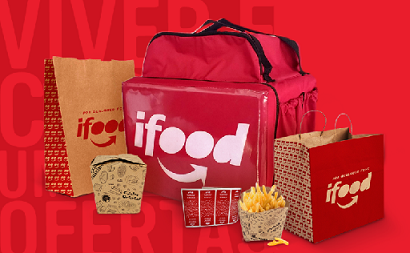

**Case - Data Analyst**

iFood é uma empresa brasileira fundada em 2011, atuante no ramo de entrega de comida pela internet, sendo líder no setor na América Latina, com presença na Argentina, no México e na Colômbia.


**Conhecendo o dataset**

In [214]:
ifood = pd.read_csv('//content//ml_project1_data.csv')
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [215]:
ifood.shape

(2240, 29)

**Identificando os tipos de variáveis**

In [216]:
ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [217]:
ifood_clear = ifood.dropna()

**Gráfico de dispersão entre cada variável (pairplot)**

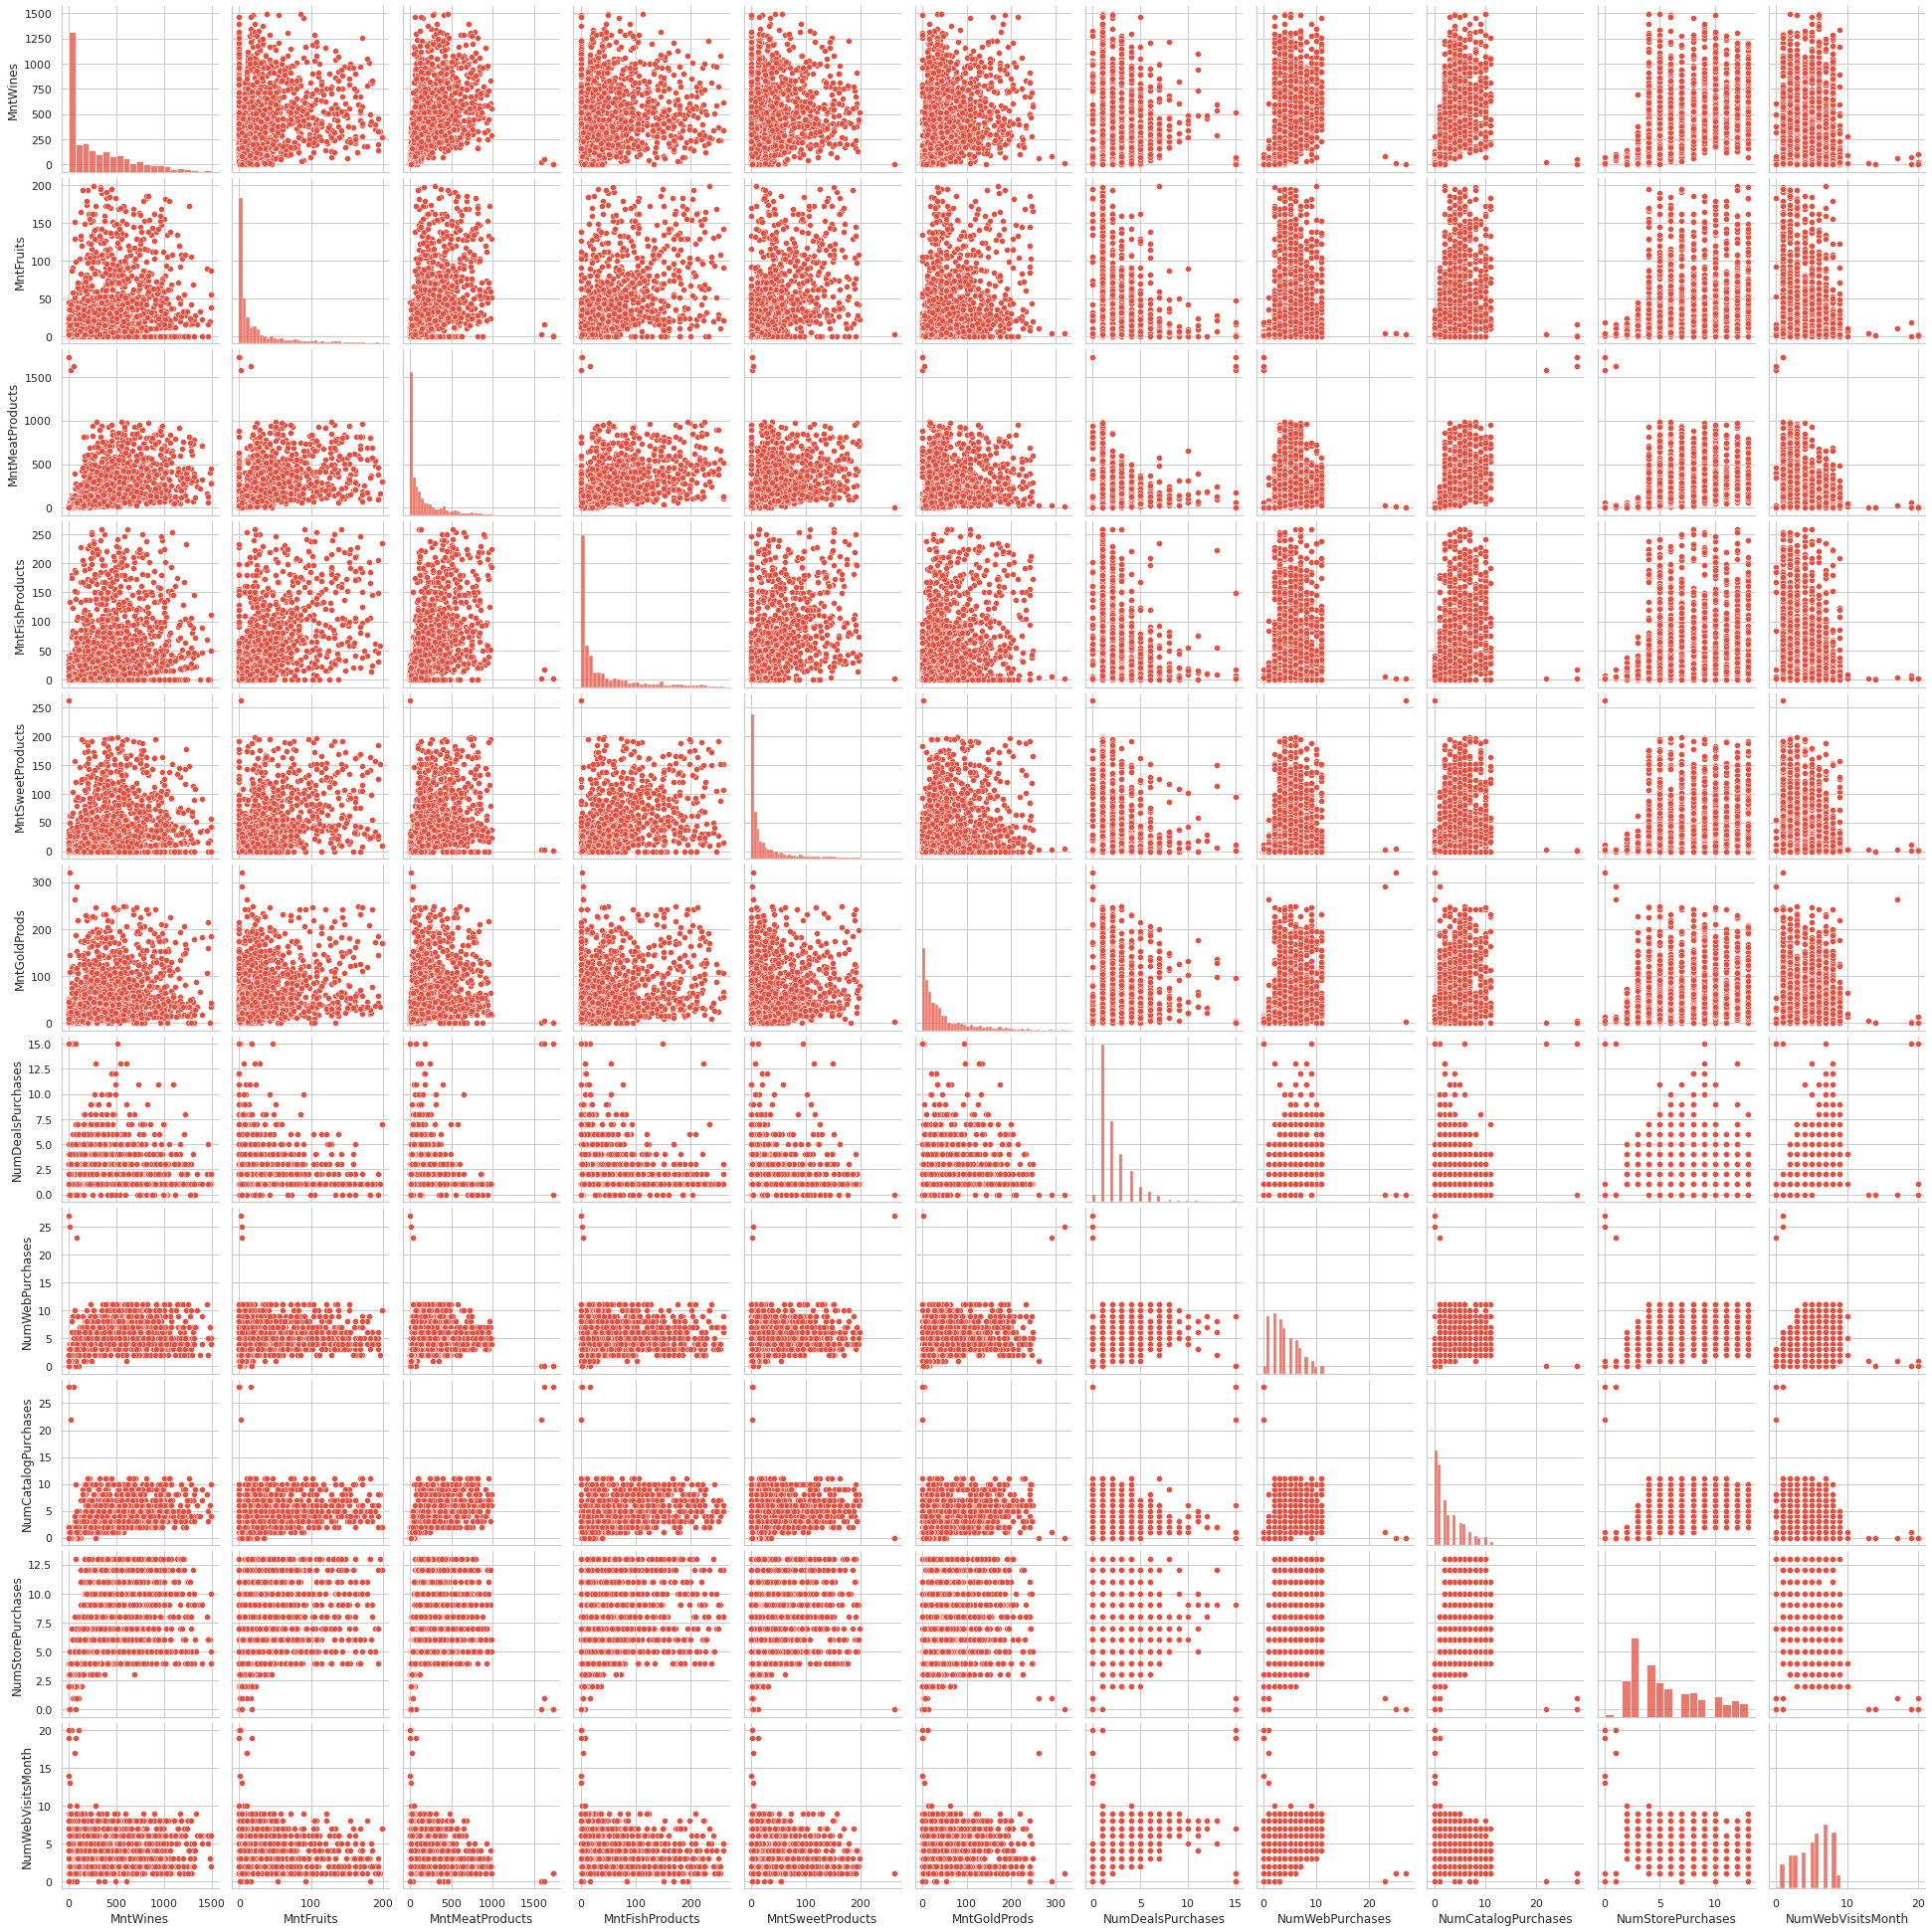

In [218]:
sns.pairplot(ifood_clear.iloc[:, 9:20])

Pairplot é uma técnica muito úil para encontrar padrões de correlação entre as features. É possível observar, por exemplo, que a variável "MntWine" tem forte correlação com a variável "MntMeatProducts". 
.

**Matriz de correlação com agrupamento hierárquico**

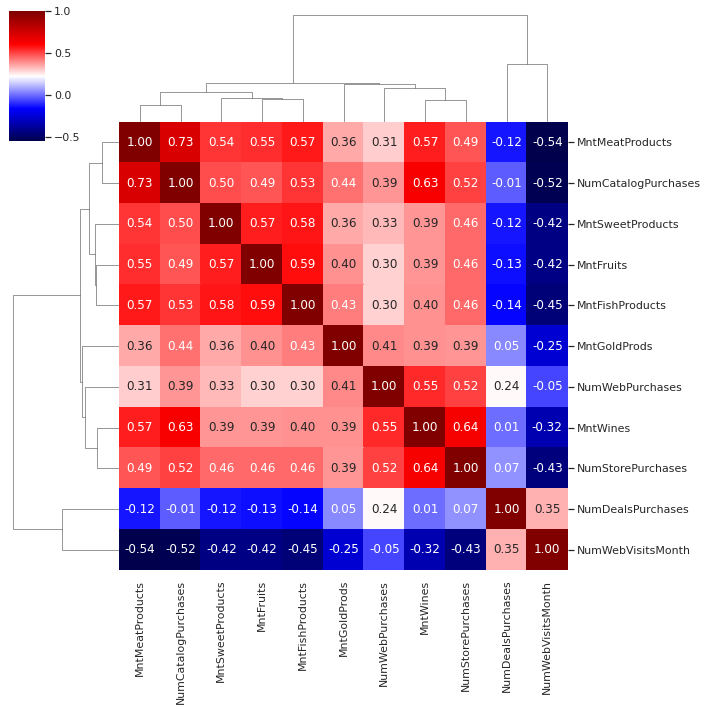

In [219]:
corr_matrix = ifood_clear.iloc[:, 9:20].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", cmap='seismic')

Mesmo que correlação não indique causalidade, devemos ter atenção com esta etapa. 

Dois pontos aqui chama atenção:


*   A **correlação** de 0,73 (forte) entre "**MntMeatProducts**" e "**NumCatalogPurchases**" pode sugerir que boa parte das compras do catalógo são de fato produtos que têm a carne como prato principal. No entanto, devemos validar esta hipótese como testes estatísticos.
*   da mesma forma, **correlação** de 0,63 (fraca) entre "**MntWines**" e "**NumCatalogPurchases**" pode sugerir que os clientes gostam de comprar vinhos pelo catálogo principal. No entanto, devemos validar esta hipótese como testes estatísticos.



**Slice do dataframe para trabalhar dados específicos de compras x características familiares, educaional e de estado civil dos clientes**

In [220]:
best_products = ifood_clear.loc[:, ['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
best_products['Itens Comprados'] = best_products.iloc[:, 3:].sum(axis=1)

**Conhecendo o estado civil dos clientes**

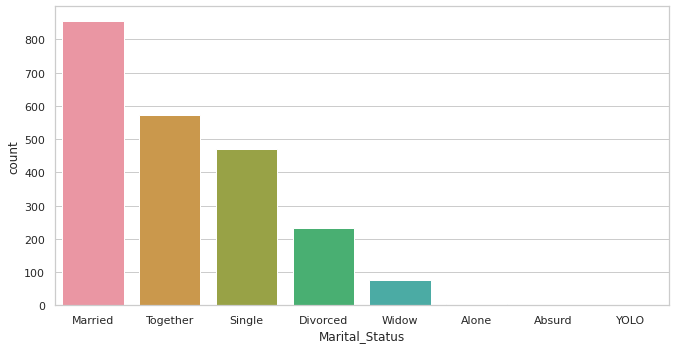

In [221]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Marital_Status', data=best_products, order=best_products['Marital_Status'].value_counts().index)

**Conhecendo o grau de educação dos clientes**

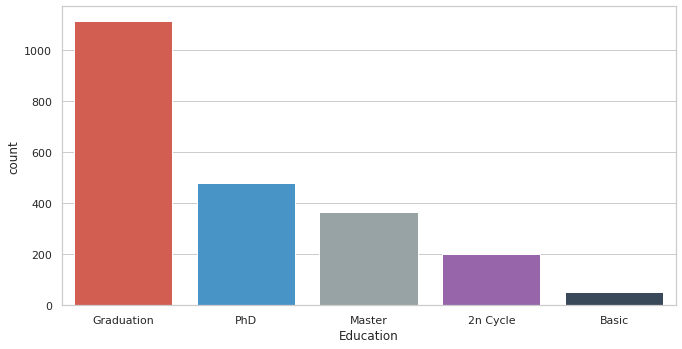

In [222]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Education', data=best_products, order=best_products['Education'].value_counts().index)

É visível (e de certa forma esperado - pois se trata de uma base Brasileira) que a quantidade de clientes que possuem graução é consideravelmente maior que os demais gruupos. Esta informação pode ser usada para ofertas direcionadas

**Boxplot: Padrão de consumo no Ifood x Nº de crianças na família**

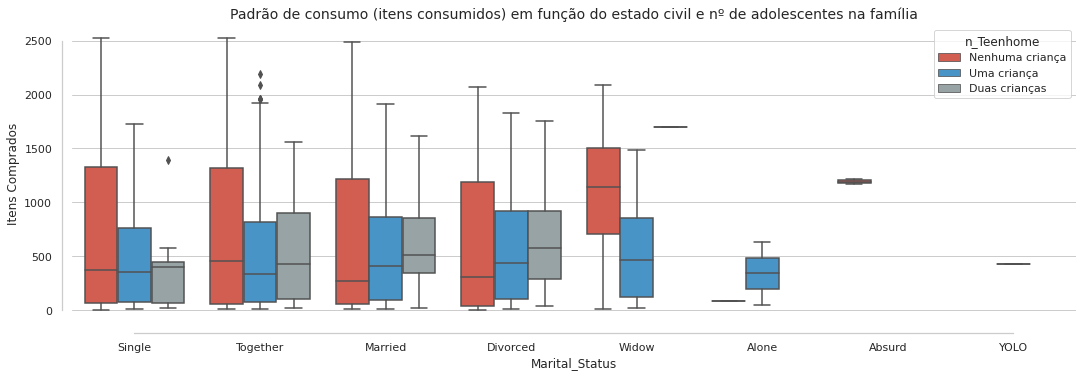

In [223]:
best_products['n_Teenhome'] = ifood_clear['Teenhome'].replace({0: 'Nenhuma criança', 1: 'Uma criança', 2: 'Duas crianças'})

plt.figure(figsize=(18, 5.5))
plt.title("Padrão de consumo (itens consumidos) em função do estado civil e nº de adolescentes na família", fontsize=14)
sns.boxplot(y='Itens Comprados', x='Marital_Status', hue='n_Teenhome', data=best_products)
sns.despine(offset=10, trim=True)

O gráfico de boxplot nos traz um insight bastante interessante. Observa-se que 50% dos viúvos têm um padrão de gastos maior que a média de todas as outras categorias. Se eles têm maior propensão ao gasto, poderíamos direcionar os esforços e aumentar o leque de oferta para eles.

Outro ponto que chama atenção é o que os clientes do grupo "Absurd" (embora em número consideravelmente menor) costumam comprar muito mais. Existe aqui uma oportunidade de direcionar ofertas para este nicho, sabendo que eles estão propensos ao consumo.


**Boxplot: Padrão de consumo x Nº de adolescentes na família**

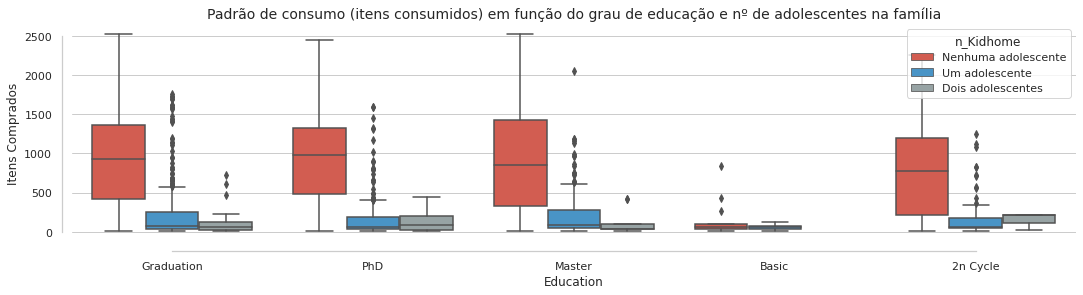

In [224]:
best_products['n_Kidhome'] = ifood_clear['Kidhome'].replace({0: 'Nenhuma adolescente', 1: 'Um adolescente', 2: 'Dois adolescentes'})

plt.figure(figsize=(18, 4))
plt.title("Padrão de consumo (itens consumidos) em função do grau de educação e nº de adolescentes na família", fontsize=14)
sns.boxplot(y='Itens Comprados', x='Education', hue='n_Kidhome', data=best_products)
sns.despine(offset=10, trim=True)

Uma coisa que chama atenção nesta análise é que existem **muitos outliers** em famílias que têm **um adolescente em casa**. Isso pode sugerir que a presença de um adolescente na família exerce discrepâncias no padrão de consumos das famílias, quando comparado com as categorias "nenhum adolescente" e "dois adolescentes".

**Detecção de outliers na variável renda**

Iremos considerar **outliers** os valores maiores que **2 desvios padrão da média**.





In [225]:
income_outlier = ()
for x in ifood_clear['Income']:
  if( x > ifood_clear['Income'].mean() + 2 * np.std(ifood_clear['Income'])):
    income_outlier = x
    print(income_outlier)

157243.0
102692.0
162397.0
105471.0
153924.0
160803.0
157733.0
157146.0
113734.0
156924.0
666666.0


**Remoção de outliers**

In [226]:
ifood_clear = ifood_clear.drop(ifood_clear[(ifood_clear.Income > ifood_clear.Income.mean() + 2 * np.std(ifood_clear.Income))].index)

**Distribuição das Rendas**

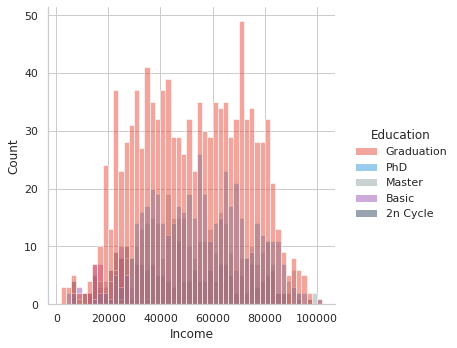

In [227]:
sns.displot(ifood_clear, x='Income', hue='Education', bins=50)

In [228]:
print('A renda média bi-anual dos clientes é R$', np.round(ifood_clear['Income'].mean(), 0))
print('A renda média anual dos clientes é R$', np.round(ifood_clear['Income'].mean()/2, 0))

A renda média bi-anual dos clientes é R$ 51558.0
A renda média anual dos clientes é R$ 25779.0


Podemos observar que clientes que possuem nível de educação "PhD" possuem **menor variabilidade na renda bi-anual**. Com essa informação podemos direcionar esforços a fim de retê-los em noassa base - estes clientes estão mais propensos a continuar com este padrão de consumo.

**Conhecendo a distribuição de idade dos clientes**

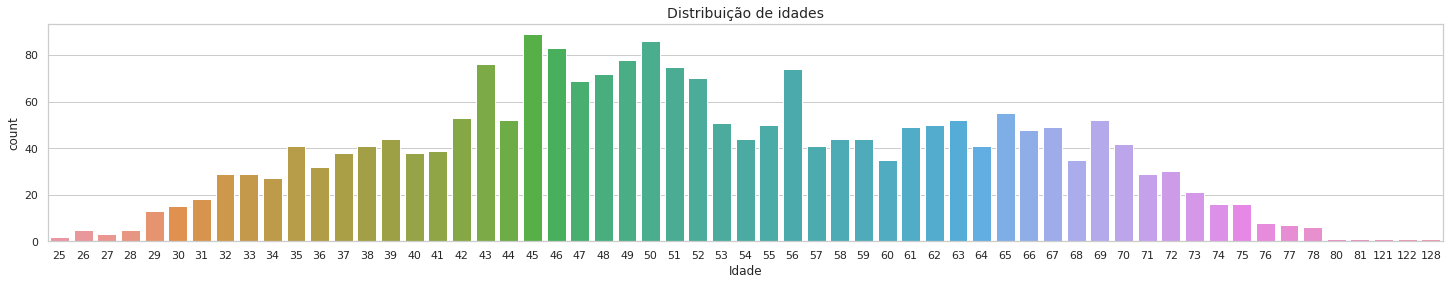

In [229]:
best_products['Idade'] = pd.to_datetime("now").year - best_products["Year_Birth"]

plt.figure(figsize=(25, 4))
plt.title("Distribuição de idades", fontsize=14)
sns.countplot(x='Idade', data=best_products)

In [230]:
print('A idade média dos clientes é', np.round(best_products['Idade'].mean(), 0), 'anos.')

A idade média dos clientes é 52.0 anos.


É um tanto quanto surpreendente ver que a **média de idade** dos clientes é **bastante 'alta**' - 52 anos. Esta análise é importante, clientes nesta faixa etária de hábitos alimentares mais específicos e, não raramente, optam por produtos mais saudáveis, mesmo que o custo seja maior. Vale a pena considerar os seguintes produtos para este grupo de clientes: peixes, saladas, frutas e graõs. 

**Proporção do nº de crianças na família**

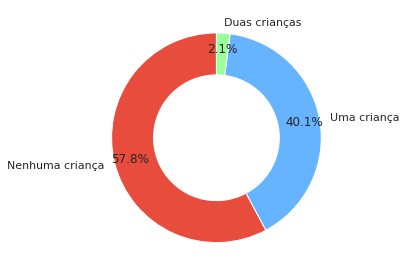

In [240]:
labels = ['Nenhuma criança', 'Uma criança', 'Duas crianças']
sizes = [ifood_clear['Kidhome'].value_counts()]
colors = ['#e74c3c','#66b3ff','#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

**Proporção do nº de adolescentes na família**

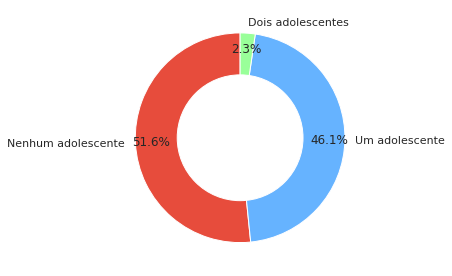

In [241]:
labels = ['Nenhum adolescente', 'Um adolescente', 'Dois adolescentes']
sizes = [ifood_clear['Teenhome'].value_counts()]
colors = ['#e74c3c','#66b3ff','#99ff99']
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

É importante observar que quase metade dos clientes possuem um adolescente na  família. Uma forma de **engajar** os clientes é criando **vínculo emocional** com eles.

Vale a pena oferecer mimos e mensagens neste contexto, para manter estes satisfeitos com o ifood.

**Construindo um dataframe para os canais de compras e visitas na web**

In [233]:
purchases = ifood_clear.loc[:, ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
purchases.columns = ['Deals', 'Web', 'Catalog', 'Store', 'Visits_Month']

**Empilhando os dados para construção do boxplot**

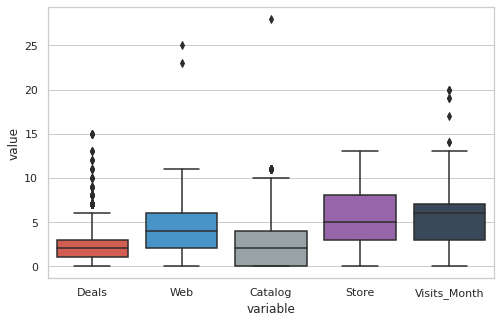

In [234]:
purchase_melt = pd.melt(purchases)

plt.figure(figsize=(8, 5))
sns.boxplot(y='value', x='variable', data=purchase_melt)

Observa-se que os clientes preferem comprar diretamente nas lojas. Outro ponto relevante é que existe a **oportunidade de maximizar a participação de vendas pelo catálogo**, uma vez que este indicador é menor que "Web" e "Store".

**Uma lupa na variável "MntWines"**

Já sabemos que os clientes adoram **vinhos**. Agora vamos ver em quais **meses** este produto é **mais procurado**.

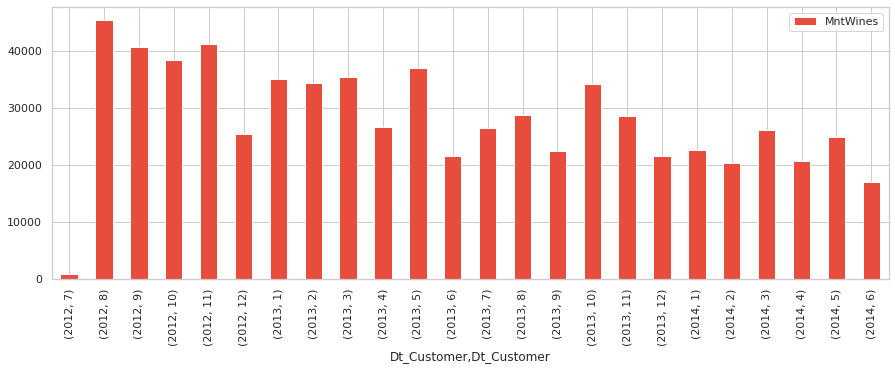

In [235]:
wine_temp_series = ifood_clear.loc[:, ['MntWines', 'Dt_Customer']]
wine_temp_series['Dt_Customer'] = pd.to_datetime(wine_temp_series['Dt_Customer'])
wine_group = wine_temp_series.groupby([wine_temp_series['Dt_Customer'].dt.year, wine_temp_series['Dt_Customer'].dt.month]).agg({'MntWines':sum})

wine_group.plot(kind='bar',figsize=(15,5))
plt.show()

In [239]:
var = np.round(((18000/45000-1)*100),2)

print('A redução na quantidade de vinhos vendidos no período foi de', var, '%.')

A redução na quantidade de vinhos vendidos no período foi de -60.0 %.


É uma pena que nossos #foodlovers **estão deixando de curtir** jantares a luz de velas acompanhados de um bom vinho". A significante redução na quantidade de vinhos comprados ao longo do tempo é uma excelente **oportunidade de melhorarmos** nosso leque de opções, preços e também de incentivarmos nossos parceiros na oferta destes produtos.